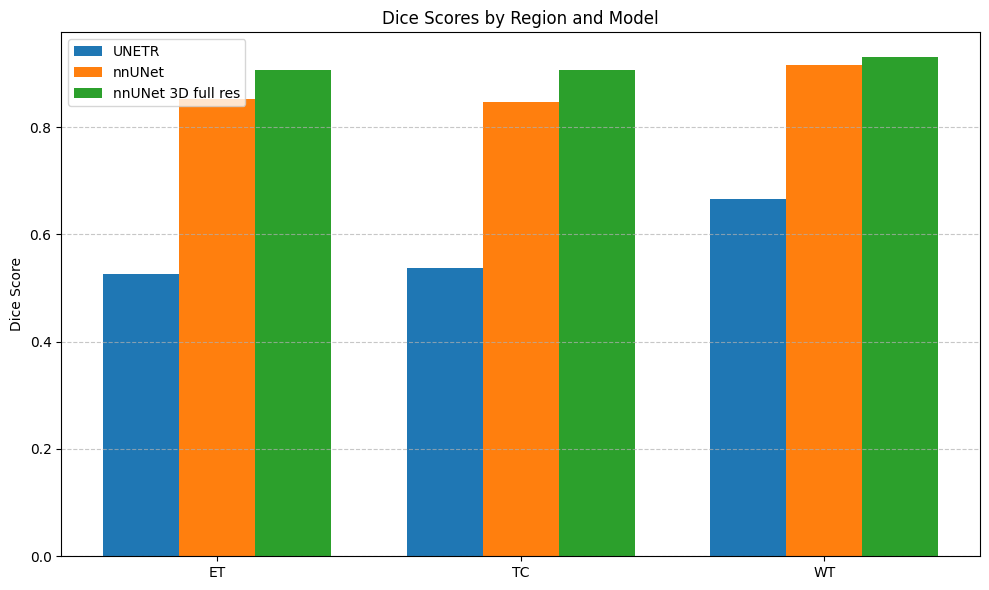

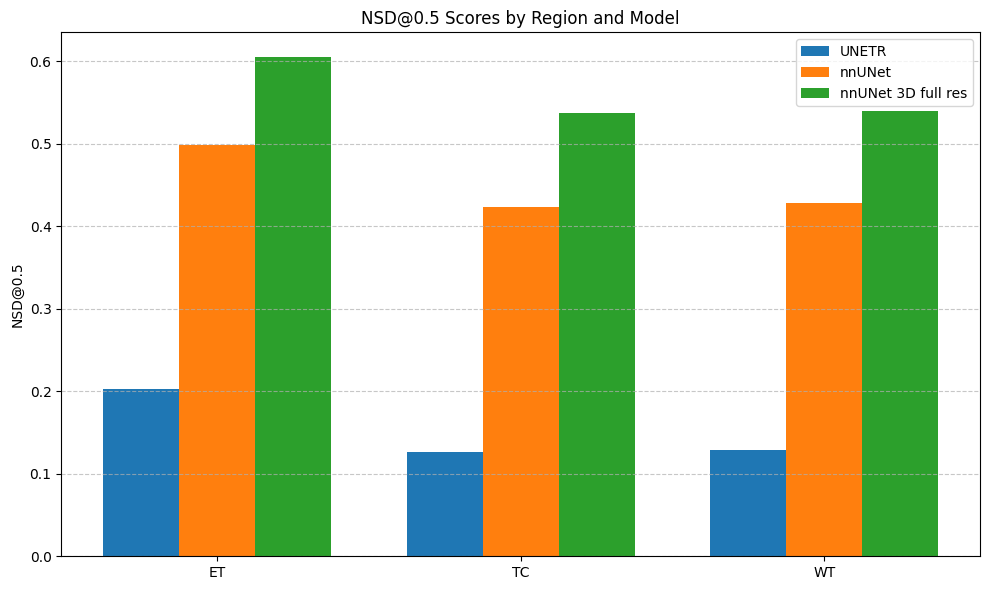

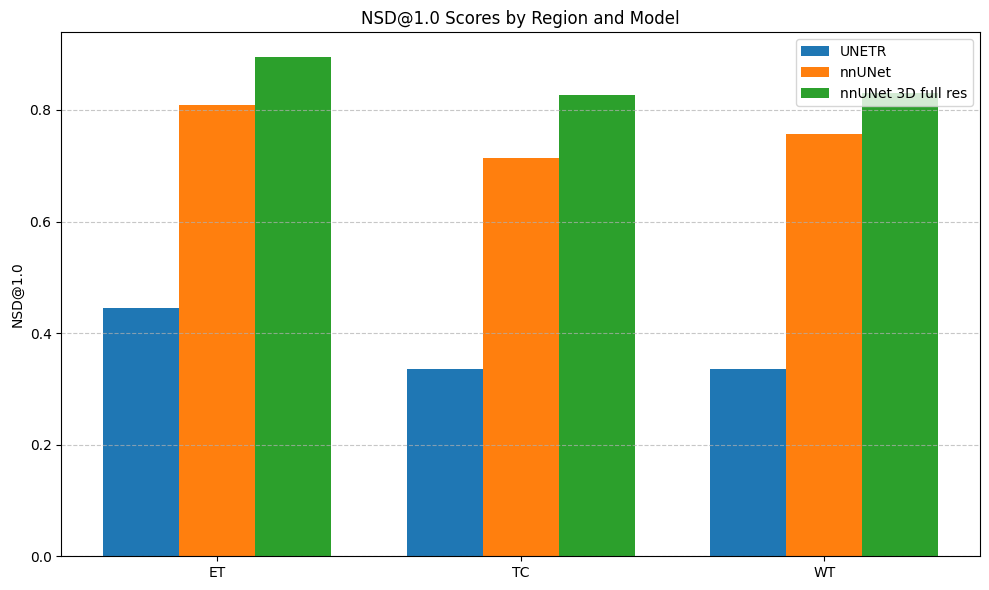

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and regions
models = ['UNETR', 'nnUNet', 'nnUNet 3D full res']
regions = ['ET', 'TC', 'WT']

# Dice scores
dice_scores = {
    'UNETR': [0.5263, 0.5372, 0.6665],
    'nnUNet': [0.8515, 0.8462, 0.9152],
    'nnUNet 3D full res': [0.9056, 0.9062, 0.9300]
}

# NSD@0.5 scores
nsd_05_scores = {
    'UNETR': [0.2026, 0.1267, 0.1289],
    'nnUNet': [0.4988, 0.4234, 0.4282],
    'nnUNet 3D full res': [0.6050, 0.5374, 0.5395]
}

# NSD@1.0 scores
nsd_10_scores = {
    'UNETR': [0.4455, 0.3358, 0.3349],
    'nnUNet': [0.8095, 0.7132, 0.7565],
    'nnUNet 3D full res': [0.8944, 0.8273, 0.8303]
}

# Function to plot grouped bar chart
def plot_grouped_bar_chart(metric_data, title, ylabel):
    x = np.arange(len(regions))  # label locations
    width = 0.25  # width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    for i, model in enumerate(models):
        ax.bar(x + i * width, metric_data[model], width, label=model)

    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x + width)
    ax.set_xticklabels(regions)
    ax.legend()
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Plot all three metrics
plot_grouped_bar_chart(dice_scores, 'Dice Scores by Region and Model', 'Dice Score')
plot_grouped_bar_chart(nsd_05_scores, 'NSD@0.5 Scores by Region and Model', 'NSD@0.5')
plot_grouped_bar_chart(nsd_10_scores, 'NSD@1.0 Scores by Region and Model', 'NSD@1.0')


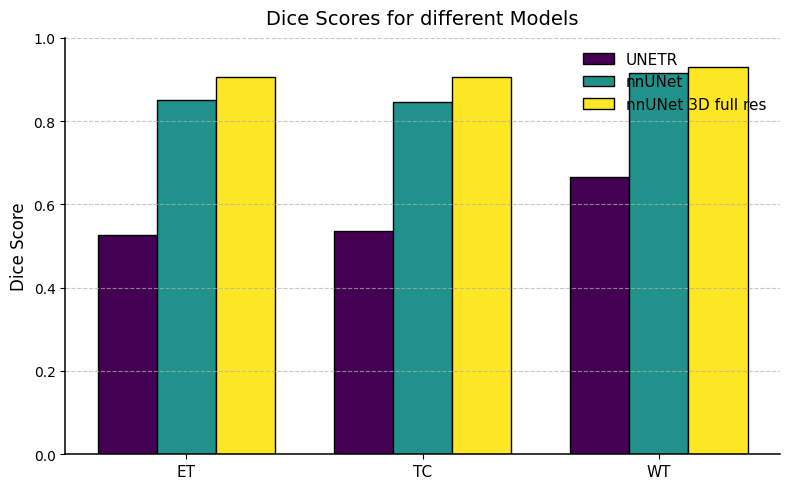

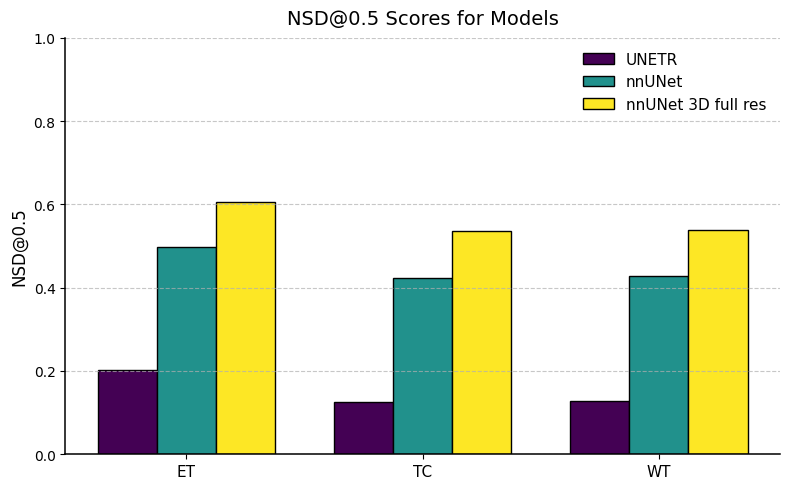

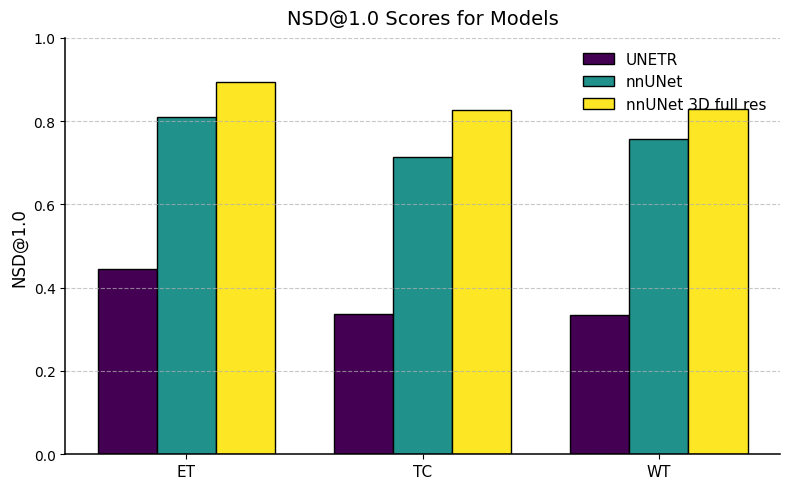

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and regions
models = ['UNETR', 'nnUNet', 'nnUNet 3D full res']
regions = ['ET', 'TC', 'WT']

# Dice scores
dice_scores = {
    'UNETR': [0.5263, 0.5372, 0.6665],
    'nnUNet': [0.8515, 0.8462, 0.9152],
    'nnUNet 3D full res': [0.9056, 0.9062, 0.9300]
}

# NSD@0.5 scores
nsd_05_scores = {
    'UNETR': [0.2026, 0.1267, 0.1289],
    'nnUNet': [0.4988, 0.4234, 0.4282],
    'nnUNet 3D full res': [0.6050, 0.5374, 0.5395]
}

# NSD@1.0 scores
nsd_10_scores = {
    'UNETR': [0.4455, 0.3358, 0.3349],
    'nnUNet': [0.8095, 0.7132, 0.7565],
    'nnUNet 3D full res': [0.8944, 0.8273, 0.8303]
}

# Choose a cool colormap for academic use
colors = plt.cm.viridis(np.linspace(0, 1, len(models)))

# Function to plot grouped bar chart with enhanced style
def plot_grouped_bar_chart(metric_data, title, ylabel):
    x = np.arange(len(regions))  # label locations
    width = 0.25  # width of the bars

    fig, ax = plt.subplots(figsize=(8, 5))
    for i, model in enumerate(models):
        ax.bar(x + i * width, metric_data[model], width, label=model,
               color=colors[i], edgecolor='black')

    # Styling
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14, pad=10)
    ax.set_xticks(x + width)
    ax.set_xticklabels(regions, fontsize=11)
    ax.set_ylim(0, 1)  # Normalize y-axis for proportion metrics
    ax.legend(frameon=False, fontsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Remove top and right spines for a cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.1)
    ax.spines['bottom'].set_linewidth(1.1)
    
    plt.tight_layout()
    plt.show()

# Plot all three metrics
plot_grouped_bar_chart(dice_scores, 'Dice Scores for different Models', 'Dice Score')
plot_grouped_bar_chart(nsd_05_scores, 'NSD@0.5 Scores for Models', 'NSD@0.5')
plot_grouped_bar_chart(nsd_10_scores, 'NSD@1.0 Scores for Models', 'NSD@1.0')


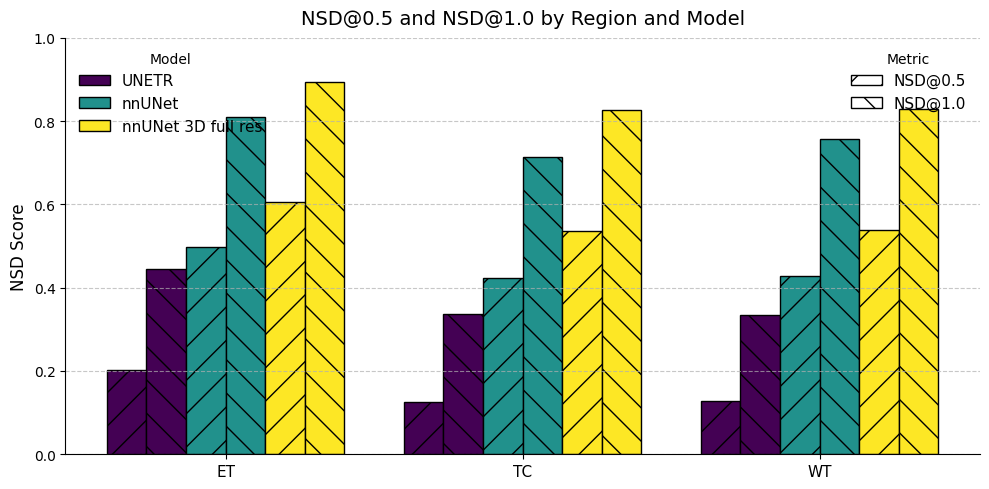

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Data setup
models = ['UNETR', 'nnUNet', 'nnUNet 3D full res']
regions = ['ET', 'TC', 'WT']
nsd05 = {
    'UNETR': [0.2026, 0.1267, 0.1289],
    'nnUNet': [0.4988, 0.4234, 0.4282],
    'nnUNet 3D full res': [0.6050, 0.5374, 0.5395]
}
nsd10 = {
    'UNETR': [0.4455, 0.3358, 0.3349],
    'nnUNet': [0.8095, 0.7132, 0.7565],
    'nnUNet 3D full res': [0.8944, 0.8273, 0.8303]
}

# Plot settings
x = np.arange(len(regions))
n_models = len(models)
n_metrics = 2  # NSD@0.5 and NSD@1.0
width = 0.8 / (n_models * n_metrics)  # total width = 0.8

# Colormap for models
colors = plt.cm.viridis(np.linspace(0, 1, n_models))
hatches = ['/', '\\']  # for NSD@0.5 and NSD@1.0

fig, ax = plt.subplots(figsize=(10, 5))

# Plot bars
for i, model in enumerate(models):
    for j, (label, metric) in enumerate([('NSD@0.5', nsd05), ('NSD@1.0', nsd10)]):
        offsets = (i * n_metrics + j) * width - (n_models * n_metrics * width / 2) + width / 2
        ax.bar(x + offsets, metric[model], width=width,
               color=colors[i], edgecolor='black', hatch=hatches[j], label=label if i == 0 else "")

# Axes and labels
ax.set_xticks(x)
ax.set_xticklabels(regions, fontsize=11)
ax.set_ylabel('NSD Score', fontsize=12)
ax.set_title('NSD@0.5 and NSD@1.0 by Region and Model', fontsize=14, pad=10)
ax.set_ylim(0, 1)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Legends
# Model legend
model_patches = [Patch(facecolor=colors[i], edgecolor='black', label=models[i]) for i in range(n_models)]
metric_patches = [Patch(facecolor='white', edgecolor='black', hatch=hatches[j], label=['NSD@0.5', 'NSD@1.0'][j]) for j in range(n_metrics)]

legend1 = ax.legend(handles=model_patches, title='Model', loc='upper left', frameon=False, fontsize=11)
legend2 = ax.legend(handles=metric_patches, title='Metric', loc='upper right', frameon=False, fontsize=11)
ax.add_artist(legend1)

plt.tight_layout()
plt.show()


In [6]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

def plot_nifti_slices(t1_path, t1c_path, t2_path, flair_path, seg_path, pred_path, slice_idx):
    """
    Load NIfTI images and plot specified axial slice for each modality.
    
    Parameters:
    - t1_path: Path to T1-weighted NIfTI file
    - t1c_path: Path to T1-contrast-enhanced NIfTI file
    - t2_path: Path to T2-weighted NIfTI file
    - flair_path: Path to T2-FLAIR NIfTI file
    - seg_path: Path to ground-truth segmentation NIfTI file
    - pred_path: Path to predicted segmentation NIfTI file
    - slice_idx: Index of the axial slice to display
    """
    # Load data
    t1 = nib.load(t1_path).get_fdata()
    t1c = nib.load(t1c_path).get_fdata()
    t2 = nib.load(t2_path).get_fdata()
    flair = nib.load(flair_path).get_fdata()
    seg = nib.load(seg_path).get_fdata()
    pred = nib.load(pred_path).get_fdata()
    
    # Prepare a list of (data, title, cmap, alpha) for plotting
    images = [
        (t1, 'T1-weighted', 'gray', 1.0),
        (t1c, 'T1c (Contrast)', 'gray', 1.0),
        (t2, 'T2-weighted', 'gray', 1.0),
        (flair, 'T2-FLAIR', 'gray', 1.0),
        (seg, 'Ground Truth Seg', 'jet', 0.5),
        (pred, 'Prediction', 'jet', 0.5),
    ]

    # Create figure
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    for idx, (data, title, cmap, alpha) in enumerate(images):
        ax = axes[idx]
        slice_img = data[:, :, slice_idx].T  # Transpose for correct orientation
        ax.imshow(slice_img, cmap='gray')
        
        # Overlay segmentation/prediction if alpha < 1
        if alpha < 1:
            ax.imshow(slice_img, cmap='gray')
            ax.imshow(data[:, :, slice_idx].T, cmap=cmap, alpha=alpha)
        ax.set_title(title)
        ax.axis('off')

    plt.tight_layout()
    plt.show()


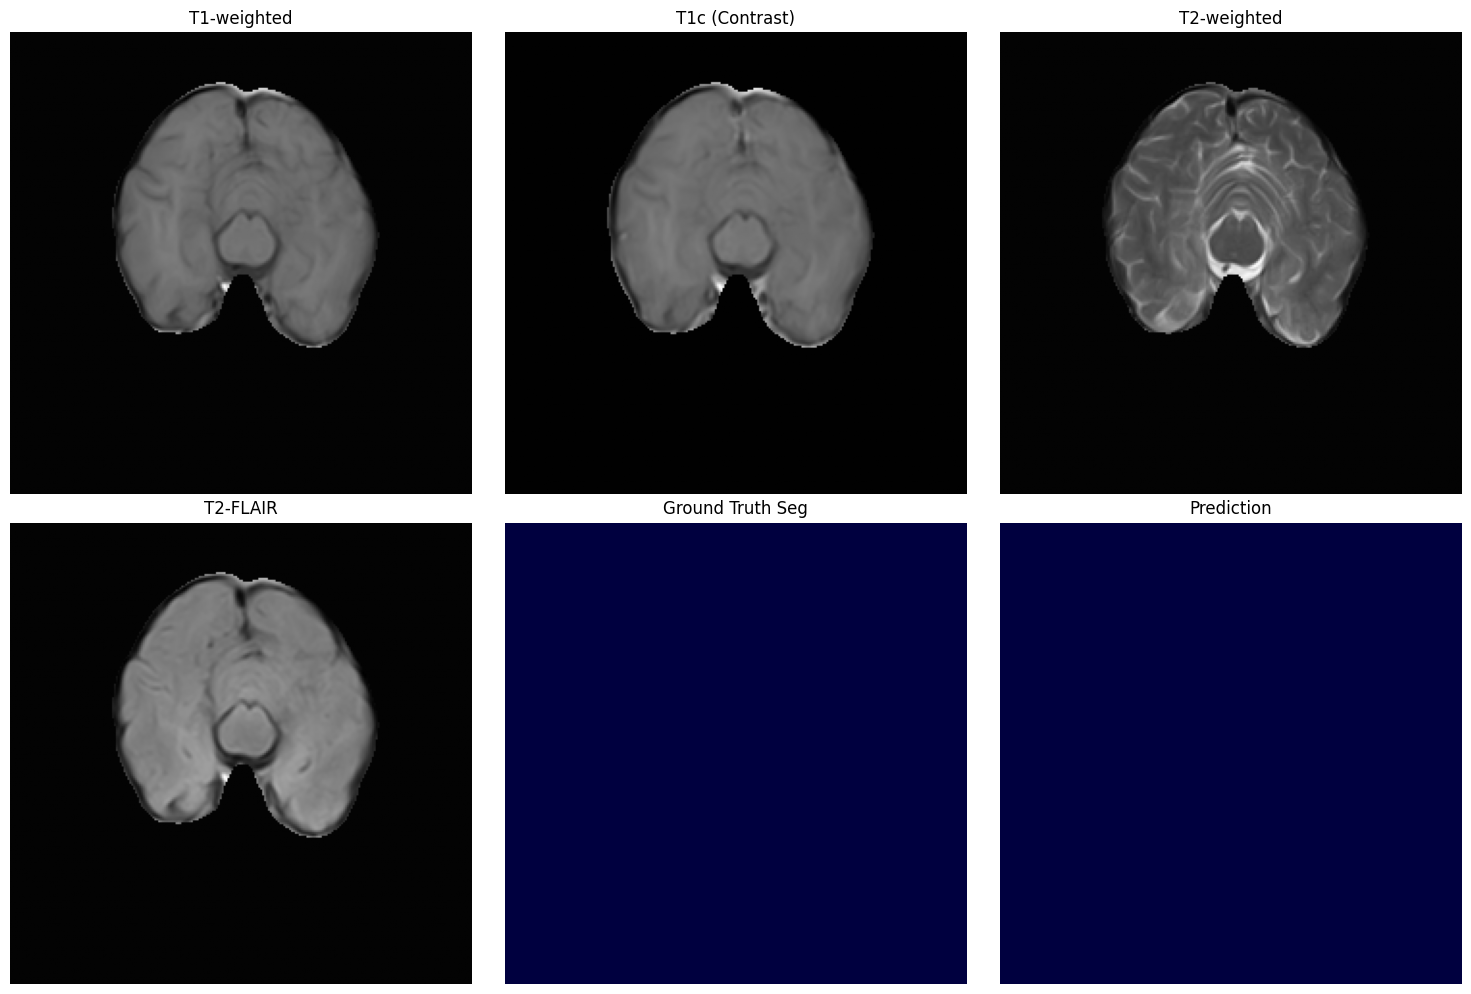

In [7]:

# Example usage (replace with your file paths and desired slice index):
t1 = "/mnt/c/Machine/Research/Spark 2025/BraTS-2025-all_setups/nnUNetFrame/others/BraTS-SSA-00014-000-t1n.nii.gz"
t1_c = "/mnt/c/Machine/Research/Spark 2025/BraTS-2025-all_setups/nnUNetFrame/others/BraTS-SSA-00014-000-t1c.nii.gz"
t2 = "/mnt/c/Machine/Research/Spark 2025/BraTS-2025-all_setups/nnUNetFrame/others/BraTS-SSA-00014-000-t2w.nii.gz"
t2_flair = "/mnt/c/Machine/Research/Spark 2025/BraTS-2025-all_setups/nnUNetFrame/others/BraTS-SSA-00014-000-t2f.nii.gz"
seg = "/mnt/c/Machine/Research/Spark 2025/BraTS-2025-all_setups/nnUNetFrame/others/BraTS-SSA-00014-000-seg.nii.gz"
pred = "/mnt/c/Machine/Research/Spark 2025/BraTS-2025-all_setups/nnUNetFrame/dataset/nnUNet_results/Dataset1137_BraTS2023_SSA/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_0/val_images_known_format/BraTS-SSA-00014-000.nii.gz"
plot_nifti_slices(t1, t1_c, t2, t2_flair, seg, pred, slice_idx=50)
